Pupil Core device timing
========================

`PupilCore().light_stamper(...)` timestamps light stimuli with the timestamp associated with the first frame where a ligh becomes visible to the world camera. The Pupil software synchronises the data streams from the cameras, but what do we know? The Pupil Core eye tracker synchronises the clocks of thre cameras, but this is not perfect. This analysis explores the reliabilty of the timing and the implications.

- discuss settings that affect timing
- results of near IR camera sync test on mac and windows and possibly on linux as well
- What does this mean for latency measures?


Test script
-----------

List all of the relevant settings used!

In [29]:
import sys
sys.path.insert(0, '../')
from time import sleep

from pyplr.stlab import SpectraTuneLab, pulse_protocol
from pyplr.pupil import PupilCore

# set up pupil
p = PupilCore()

# setup stlab and make spectrum with near-IR
d = SpectraTuneLab(
    username='admin', identity=1, password='83e47941d9e930f6')
spec = [0, 0, 0, 0, 0, 0, 0, 4095, 0, 0]
pulse_protocol(spec, 1000, '1s_near_IR_pulse')
d.load_video_file('1s_near_IR_pulse.dsf')

# trigger params
threshold = 10
timeout = 6.

# make annotations for each camera
world_annotation = p.new_annotation('LIGHT_ON_WORLD')
eye_0_annotation = p.new_annotation('LIGHT_ON_EYE_0')
eye_1_annotation = p.new_annotation('LIGHT_ON_EYE_1')

# start recording and wait 10 s
p.command('R pupil_core_camera_sync_tests')
sleep(5.)

# results
results = {'world': [],
           'eye_0': [],
           'eye_1': []}

# 400 1s pulses
for i in range(20):
    # start light_stampers
    lst_world = p.light_stamper(
        world_annotation, threshold, timeout,
        topic='frame.world')
    sleep(.003)
    lst_eye_0 = p.light_stamper(
        eye_0_annotation, threshold, timeout,
        topic='frame.eye.0')
    sleep(.003)
    lst_eye_1 = p.light_stamper(
        eye_1_annotation, threshold, timeout, 
        topic='frame.eye.1')
    
    # wait 100 ms then present stimulus
    sleep(1.)
    d.play_video_file()
    
    sleep(6.)
    
    results['world'].append(lst_world.result())
    results['eye_0'].append(lst_eye_0.result())
    results['eye_1'].append(lst_eye_1.result())

# wait for 5 s and stop recording
sleep(5.)   
p.command('r')

STLAB device setup complete...
"1s_near_IR_pulse.dsf" saved in the current working directory.
video file loaded...
Waiting for a light to stamp...
Waiting for a light to stamp...
Waiting for a light to stamp...
Light stamped on frame.eye.0 at 11593.834273
Light stamped on frame.world at 11593.779271
Light stamped on frame.eye.1 at 11593.842076
playing video file...
Waiting for a light to stamp...
Waiting for a light to stamp...
Waiting for a light to stamp...
Light stamped on frame.world at 11601.010922
Light stamped on frame.eye.0 at 11601.075007000001
Light stamped on frame.eye.1 at 11601.078168
playing video file...
Waiting for a light to stamp...
Waiting for a light to stamp...
Waiting for a light to stamp...
Light stamped on frame.world at 11608.242958
Light stamped on frame.eye.0 at 11608.301974
Light stamped on frame.eye.1 at 11608.301952
playing video file...
Waiting for a light to stamp...
Waiting for a light to stamp...
Waiting for a light to stamp...
Light stamped on frame.e

'OK'

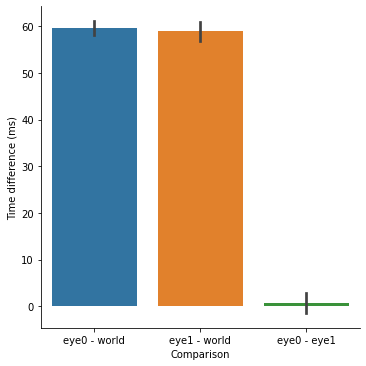

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for k in results.keys():
#    results[k] = np.array([val[1] for val in results[k]])
    
df = pd.DataFrame(results)
diffs = (pd.DataFrame([(df.eye_0-df.world)*1000, 
                       (df.eye_1-df.world)*1000,
                       (df.eye_0-df.eye_1)*1000], 
                      index=['eye0 - world',
                             'eye1 - world',
                             'eye0 - eye1'])
           .T.melt(var_name='camdiff', value_name='timestamp'))
g = sns.catplot(x="camdiff", y="timestamp", data=diffs, kind='bar')
(g.set(xlabel='Comparison',
       ylabel='Time difference (ms)'))

MacOS
-----

Results

Windows
-------

Results

Implications for latency measures
---------------------------------

- biological implausability on mac
- Repeatability and possibility of correction
- etc.
